# 🧪 Exploratory Data Analysis For Titanic Dataset


### 📦 1. Load and Preview the Dataset


In [1]:
import pandas as pd

# Load Titanic dataset
df = pd.read_csv("train.csv")

# Display first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 🔍 Step 2: Understand the Structure of the Dataset


In [2]:
# Shape of the dataset
print("Shape:", df.shape)

# Data types and non-null values
df.info()

Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 📉 Step 3: Check for Missing Values


In [3]:
# Total missing values per column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 🧹 Step 4: Clean the Data (Handle Missing Values)


In [4]:
# Fill missing 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' due to too many missing values
df.drop(columns='Cabin', inplace=True)


C:\Users\Ch Hassan\AppData\Local\Temp\ipykernel_3864\2225322681.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Ch Hassan\AppData\Local\Temp\ipykernel_3864\2225322681.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


### 🧹 Step 5: Remove Duplicate Rows (if any)


In [5]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)


### ❕ Step 6: Identify and Manage Outliers

6.1 Visualize Outliers Using Boxplots


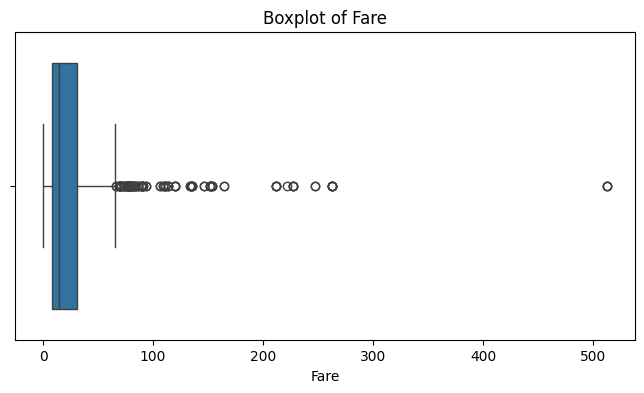

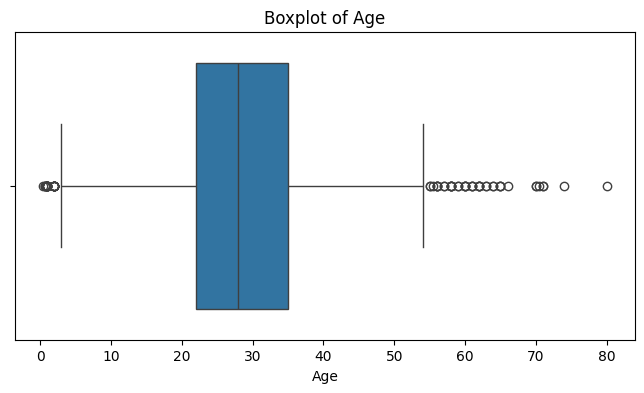

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for Fare
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()

# Boxplot for Age
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()


6.2 Detect Outliers with IQR Method


In [7]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

fare_outliers = detect_outliers_iqr(df, 'Fare')
age_outliers = detect_outliers_iqr(df, 'Age')

print(f"Fare outliers: {len(fare_outliers)}")
print(f"Age outliers: {len(age_outliers)}")



Fare outliers: 116
Age outliers: 66


### Step 7: Visualizations

7.1 Bar Charts for Categorical Variables


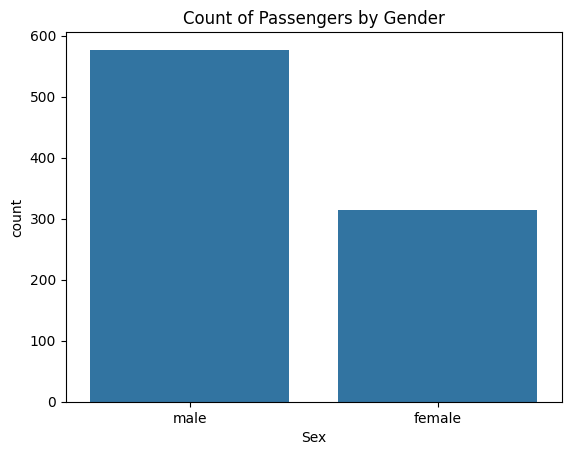

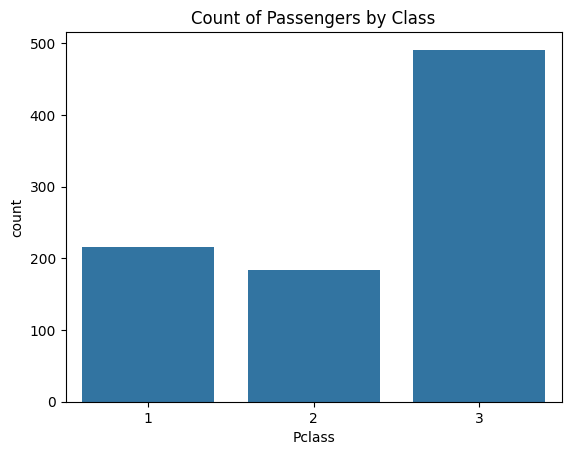

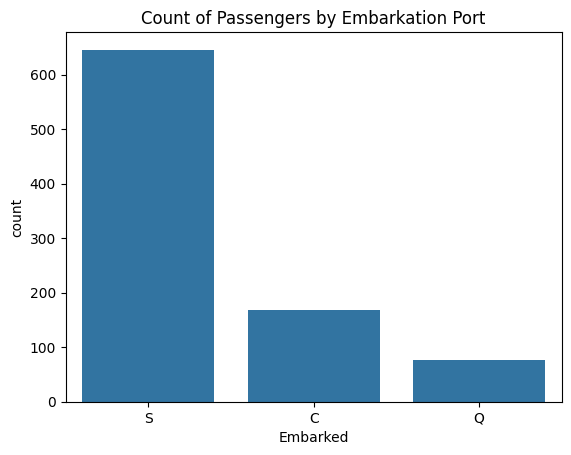

In [8]:
# Count by Gender
sns.countplot(x='Sex', data=df)
plt.title('Count of Passengers by Gender')
plt.show()

# Count by Passenger Class
sns.countplot(x='Pclass', data=df)
plt.title('Count of Passengers by Class')
plt.show()

# Count by Embarked Port
sns.countplot(x='Embarked', data=df)
plt.title('Count of Passengers by Embarkation Port')
plt.show()


7.2 Histograms for Numeric Distributions


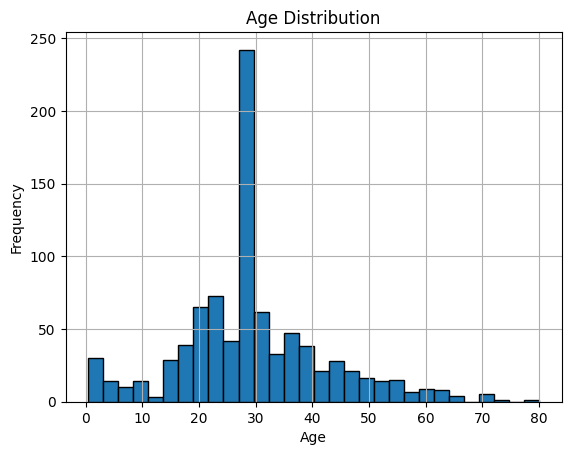

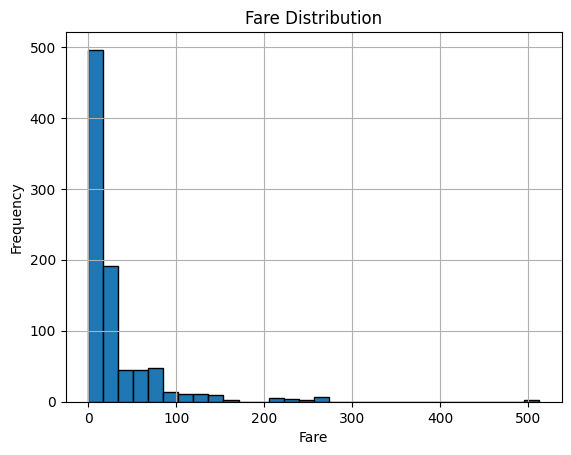

In [9]:
# Age distribution
df['Age'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Fare distribution
df['Fare'].hist(bins=30, edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


7.3 Correlation Heatmap for Numeric Features


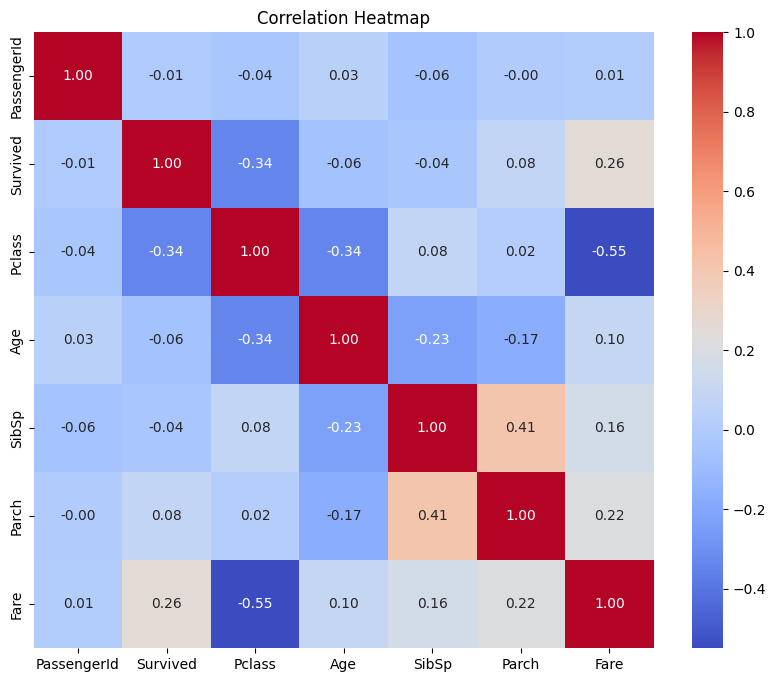

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## Step 8: Summarize Insights


## Summary of Findings

- More male passengers than female.
- Most passengers were in 3rd class.
- Majority embarked from Southampton ('S').
- Age distribution mostly between 20 and 40 years old.
- Fare distribution skewed right with few passengers paying very high fares.
- Correlation heatmap shows:
  - Negative correlation between Pclass and Survival (1st class had better survival).
  - Positive correlation between Fare and Survival.
